In [71]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import time
import numpy as np
import pylab as plt

import localpaths
import subimage

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
si = subimage.parse_LISA('~/Data/LISA/allAnnotations.csv')

['aiua120214-0', 'aiua120214-1', 'aiua120214-2', 'aiua120306-0', 'aiua120306-1', 'vid0', 'vid1', 'vid10', 'vid11', 'vid2', 'vid3', 'vid4', 'vid5', 'vid6', 'vid7', 'vid8', 'vid9']


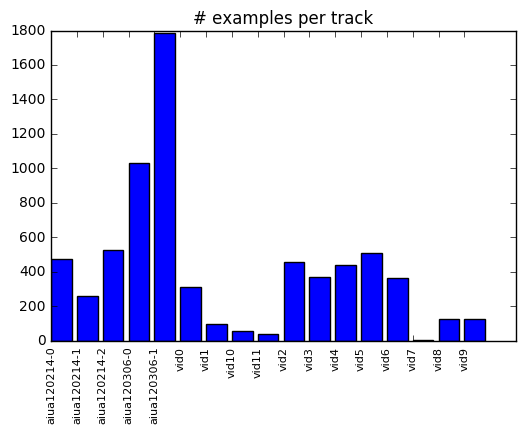

In [58]:
# Take a look at class representation across the various data cuts
all_tracks = list({x : 0 for x in si._gid}.keys())
all_tracks.sort()
print(all_tracks)

y_all = np.array(si._y)
examples_per_track = np.zeros((len(all_tracks),))

for ii, track_id in enumerate(all_tracks):
    idx = [x for x in range(len(si._y)) if si._gid[x] == track_id]
    idx = np.array(idx, dtype=np.int32)
    y_vals = y_all[idx]
    
    examples_per_track[ii] = y_vals.size
    
    #plt.figure()
    #plt.hist(y_vals, np.max(y_all))
    #plt.title('class labels for track %s' % track_id)

    
plt.figure()
plt.bar(range(len(all_tracks)), examples_per_track)
plt.gca().set_xticks(np.arange(len(all_tracks)))
plt.gca().set_xticklabels(all_tracks, rotation='vertical', fontsize=8)
plt.title('# examples per track')
plt.show()

In [76]:
# Propose a track-based train/test split
train_grp = ['aiua120214-0', 'aiua120214-1', 'aiua120306-1'] + ['vid%d' % x for x in range(6)]
test_grp = ['aiua120214-2', 'aiua120306-0'] + ['vid%d' % x for x in range(6,12)]

train_idx = []
test_idx = []

for gid in train_grp:
    indices = [x for x in range(len(si._y)) if si._gid[x] == gid]
    assert(len(indices) > 0)
    train_idx.extend(indices)
    
for gid in test_grp:
    indices = [x for x in range(len(si._y)) if si._gid[x] == gid]
    assert(len(indices) > 0)
    test_idx.extend(indices)

train_idx = np.array(train_idx, np.int32)
test_idx = np.array(test_idx, np.int32)
                   
print('# train, # test:', len(train_idx), len(test_idx))

# this is a little slow...
tic = time.time()
x_train, y_train = si.get_subimages(train_idx, verbose=True)
x_test, y_test = si.get_subimages(test_idx, verbose=True)
print(time.time() - tic, ' seconds to load images')


# train, # test: 4687 2279
loading image 0 (of 4687)
loading image 500 (of 4687)
loading image 2560 (of 4687)
loading image 3060 (of 4687)
loading image 3560 (of 4687)
loading image 4060 (of 4687)
loading image 4654 (of 4687)
loading image 5154 (of 4687)
loading image 5654 (of 4687)
loading image 6154 (of 4687)
loading image 730 (of 2279)
loading image 1230 (of 2279)
loading image 1730 (of 2279)
loading image 2230 (of 2279)
loading image 6781 (of 2279)


NameError: name 'toc' is not defined

median # rows, train: 32.0
median # rows, test:  31.0
median # cols, train: 31.0
median # cols, test:  29.0
(7269242,)
(3447444,)


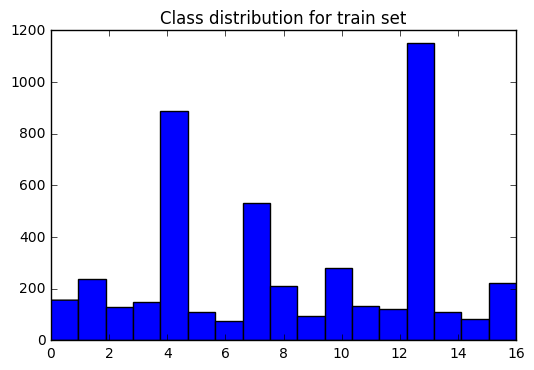

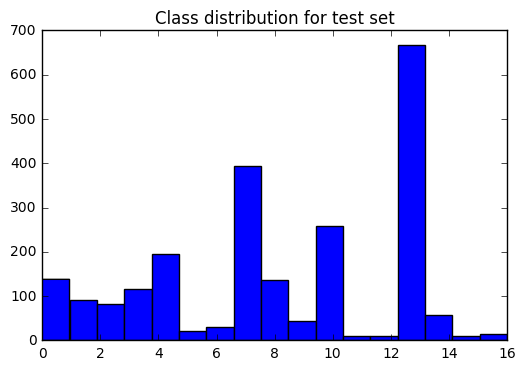

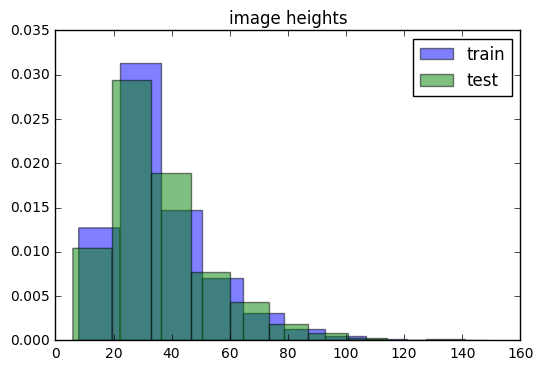

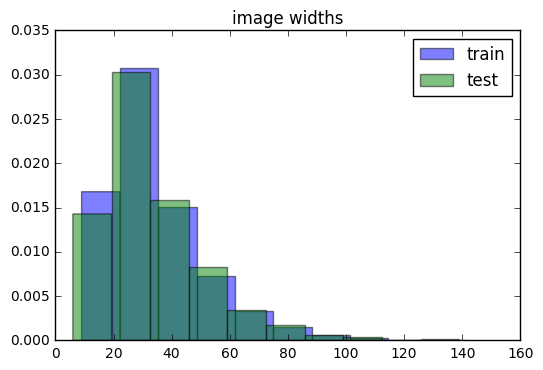

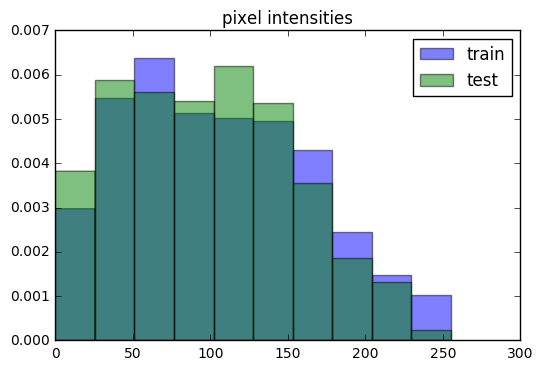

In [100]:
# Take a look at some properties of the data

#
# overall distribution of examples in train/test
#
plt.figure()
plt.hist(y_train, np.max(y_all)+1)
plt.title('Class distribution for train set')

plt.figure()
plt.hist(y_test, np.max(y_all)+1)
plt.title('Class distribution for test set')


#
# statistics on image size
#
rows_train = [x_train[ii].shape[0] for ii in range(len(x_train))]
cols_train = [x_train[ii].shape[1] for ii in range(len(x_train))]
rows_test = [x_test[ii].shape[0] for ii in range(len(x_test))]
cols_test = [x_test[ii].shape[1] for ii in range(len(x_test))]

print('median # rows, train:', np.median(rows_train))
print('median # rows, test: ', np.median(rows_test))
print('median # cols, train:', np.median(cols_train))
print('median # cols, test: ', np.median(cols_test))

plt.figure()
plt.hist(rows_train, alpha=0.5, label='train', normed=True)
plt.hist(rows_test, alpha=0.5, label='test', normed=True)
plt.legend()
plt.title('image heights')

plt.figure()
plt.hist(cols_train, alpha=0.5, label='train', normed=True)
plt.hist(cols_test, alpha=0.5, label='test', normed=True)
plt.legend()
plt.title('image widths')

#
# Pixel intensity values
#
tmp = [x.ravel() for x in x_train]
x_train_flat = np.concatenate(tmp)
print(x_train_flat.shape)

tmp = [x.ravel() for x in x_test]
x_test_flat = np.concatenate(tmp)
print(x_test_flat.shape)

plt.figure()
plt.hist(x_train_flat, alpha=0.5, label='train', normed=True)
plt.hist(x_test_flat, alpha=0.5, label='test', normed=True)
plt.legend()
plt.title('pixel intensities')

plt.show()